
Estudo do artigo https://minerandodados.com.br/analise-exploratoria-de-dados-passo-a-passo-com-python/.

A base de dados que iremos explorar será o consumidor.gov.br que é um canal para registro de reclamações dos consumidores sobre um produto ou serviço, tem a mesma ideia do Reclame Aqui mas é mantido pelo governo federal.

Para ter acesso a esses dados basta entrar em https://consumidor.gov.br/pages/dadosabertos/externo/.

In [1]:
#Importando as bibliotecas
import pandas            as pd
import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt
from IPython.display     import display
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-darkgrid')
sns.set(font_scale=1.1)

#Alterando o formato global de exibição dos dados
pd.options.display.float_format="{:.2f}".format

In [2]:
#Lendo a base de dados
url = "https://raw.githubusercontent.com/claricefiorese/estudos-python/main/2019-01.csv"
dados = pd.read_csv(url, sep=";", encoding="latin1")

In [82]:
#Visualizando as 5 primeiras linhas
dados.head().T

,0,1,2,3,4
Região,SE,SE,SE,SE,SE
UF,RJ,RJ,SP,SP,SP
Cidade,Papucaia,Japeri,São Paulo,Pindamonhangaba,São Paulo
Sexo,F,M,M,M,F
Faixa Etária,entre 61 a 70 anos,entre 31 a 40 anos,entre 31 a 40 anos,entre 51 a 60 anos,entre 21 a 30 anos
Data Finalização,30/01/2019,28/01/2019,31/01/2019,26/01/2019,24/01/2019
Tempo Resposta,3.00,0.00,2.00,1.00,0.00
Nome Fantasia,Banco Pan,Serasa Experian,Samsung,NET,Serasa Experian
Segmento de Mercado,"Bancos, Financeiras e Administradoras de Cartão",Bancos de Dados e Cadastros de Consumidores,"Fabricantes - Eletroeletrônicos, Produtos de ...","Operadoras de Telecomunicações (Telefonia, Int...",Bancos de Dados e Cadastros de Consumidores
Área,Serviços Financeiros,Serviços Financeiros,Produtos de Telefonia e Informática,Telecomunicações,Serviços Financeiros


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60557 entries, 0 to 60556
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Região                  60557 non-null  object 
 1   UF                      60557 non-null  object 
 2   Cidade                  60557 non-null  object 
 3   Sexo                    60557 non-null  object 
 4   Faixa Etária            60557 non-null  object 
 5   Data Finalização        60557 non-null  object 
 6   Tempo Resposta          59958 non-null  float64
 7   Nome Fantasia           60557 non-null  object 
 8   Segmento de Mercado     60557 non-null  object 
 9   Área                    60557 non-null  object 
 10  Assunto                 60557 non-null  object 
 11  Grupo Problema          60557 non-null  object 
 12  Problema                60557 non-null  object 
 13  Como Comprou Contratou  60557 non-null  object 
 14  Procurou Empresa        60557 non-null

In [5]:
dados.shape

(60557, 20)

Cada linha do dataset corresponde a uma reclamação feita por um consumidor.

## **Dicionário de variáveis**
- Região
- UF
- Cidade
- Sexo
- Faixa Etária
- Data Finalização
- Tempo Resposta
- Nome Fantasia
- Segmento de Mercado
- Área
- Assunto
- Grupo Problema
- Problema
- Como Comprou Contratou
- Procurou Empresa
- Respondida
- Situação
- Avaliação Reclamação
- Nota do Consumidor
- Total

## **Funções**

In [6]:
def anotacao(grafico):
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points')

In [58]:
def colore_max(data, color='yellow'):
    attr = 'color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

## **Análise Exploratória dos Dados**

### **Região**

In [7]:
#Calculando o número de reclamações por região
dados.groupby("Região")["Região"].count()

Região
CO     6027
N      1940
NE     8631
S     12545
SE    31414
Name: Região, dtype: int64

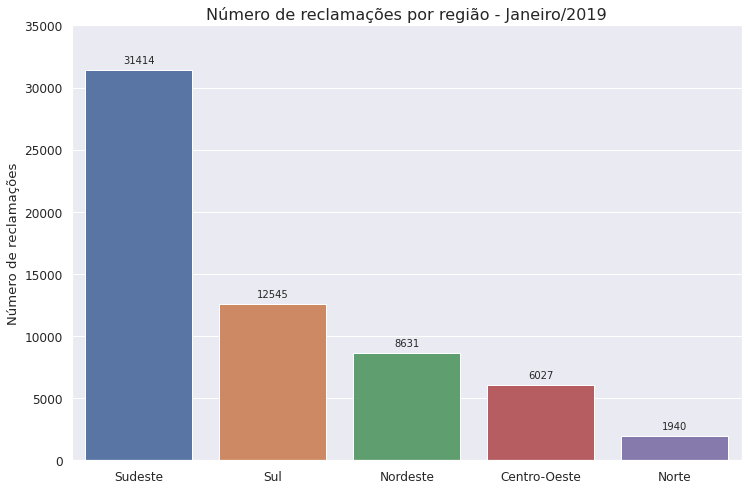

In [8]:
#Visualizando o número de reclamações por região
plt.figure(figsize=(12,8))

ax = sns.countplot(data=dados, x="Região", order = dados["Região"].value_counts().index)
ax.set_xlabel("")
ax.set_ylabel("Número de reclamações")
ax.set_title("Número de reclamações por região - Janeiro/2019", fontsize=16)
ax.set_ylim(0, 35000)
ax.set_xticklabels(["Sudeste", "Sul", "Nordeste", "Centro-Oeste", "Norte"])
anotacao(ax)

plt.show()

### **Estado**

In [9]:
#Calculando o número de reclamações por estado
dados.groupby("UF")["UF"].count()

UF
AC      207
AL      319
AM      507
AP       72
BA     2708
CE     1466
DF     2624
ES     1314
GO     1792
MA      882
MG     4763
MS      749
MT      862
PA      594
PB      731
PE     1338
PI      547
PR     6460
RJ     5480
RN      383
RO      288
RR       78
RS     4279
SC     1806
SE      257
SP    19857
TO      194
Name: UF, dtype: int64

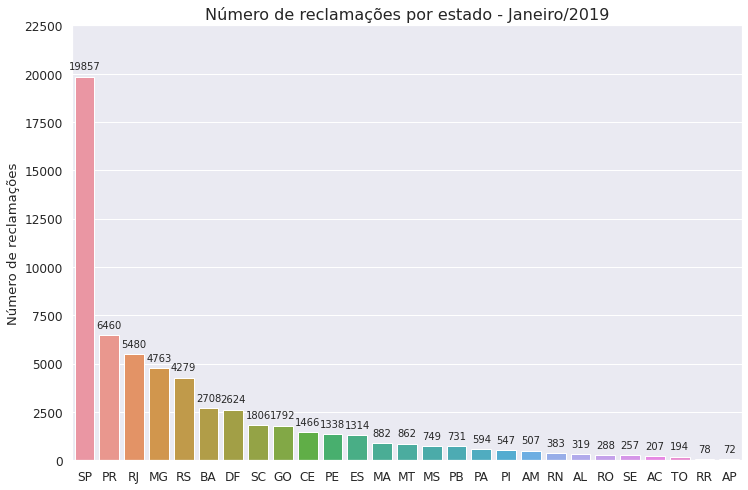

In [10]:
#Visualizando o número de reclamações por estado
plt.figure(figsize=(12,8))

ax = sns.countplot(data=dados, x="UF", order = dados.UF.value_counts().index)
ax.set_xlabel("")
ax.set_ylabel("Número de reclamações")
ax.set_title("Número de reclamações por estado - Janeiro/2019", fontsize=16)
ax.set_ylim(0, 22500)
anotacao(ax)

plt.show()

### **Cidade**

In [81]:
#Visualizando as 20 cidades com mais reclamações
dados["Cidade"].value_counts()[:20]

São Paulo                8710
Curitiba                 3085
Rio de Janeiro           2892
Brasília                 2624
Salvador                 1288
Belo Horizonte           1176
Fortaleza                 934
Goiânia                   829
Sorocaba                  712
Porto Alegre              675
Juiz de Fora              661
Itaqui                    642
Guarulhos                 530
São Bernardo do Campo     482
Campinas                  468
Manaus                    457
Recife                    453
João Pessoa               440
Osasco                    425
São Borja                 410
Name: Cidade, dtype: int64

### **Sexo**

In [11]:
#Calculando o número de reclamações por sexo
dados.groupby("Sexo")["Sexo"].count()

Sexo
F    25855
M    34702
Name: Sexo, dtype: int64

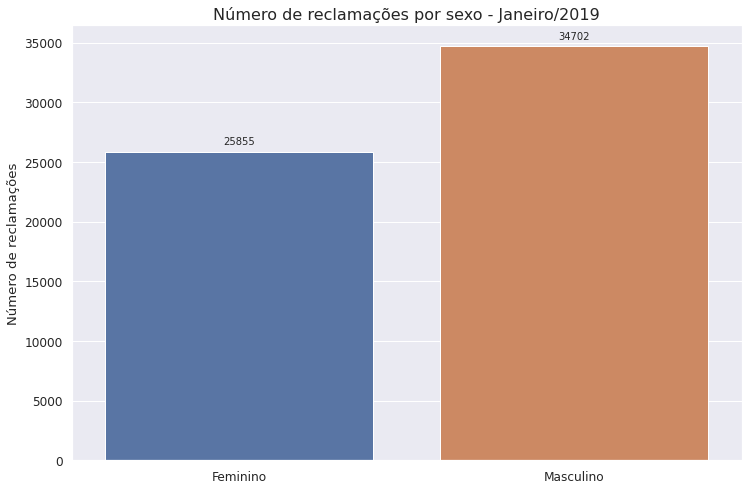

In [12]:
#Visualizando o número de reclamações por sexo
plt.figure(figsize=(12,8))

ax = sns.countplot(data=dados, x="Sexo")
ax.set_xlabel("")
ax.set_ylabel("Número de reclamações")
ax.set_title("Número de reclamações por sexo - Janeiro/2019", fontsize=16)
ax.set_xticklabels(["Feminino", "Masculino"])
anotacao(ax)

plt.show()

### **Faixa Etária**

In [13]:
#Calculando o número de reclamações por faixa etária
dados.groupby("Faixa Etária")["Faixa Etária"].count()

Faixa Etária
até 20 anos            1459
entre 21 a 30 anos    18520
entre 31 a 40 anos    20669
entre 41 a 50 anos     9481
entre 51 a 60 anos     5752
entre 61 a 70 anos     3307
mais de 70 anos        1369
Name: Faixa Etária, dtype: int64

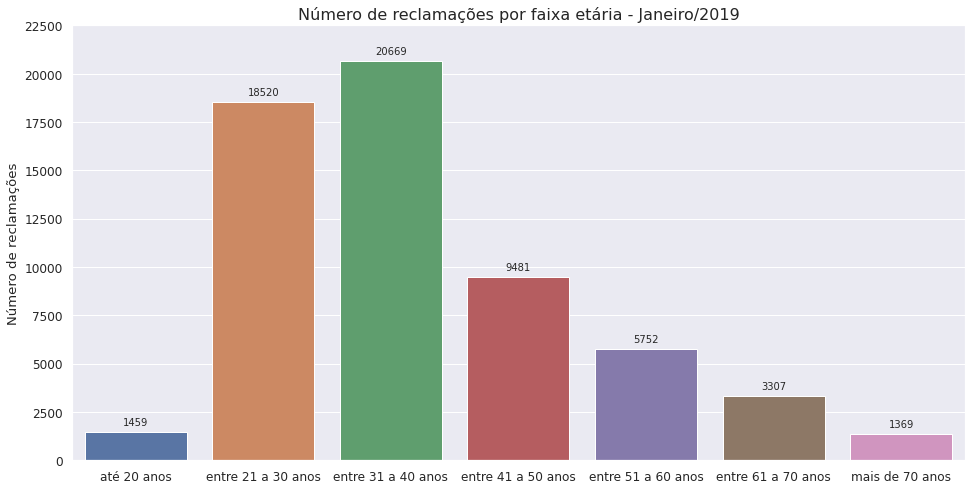

In [14]:
#Visualizando o número de reclamações por faixa etária
plt.figure(figsize=(16,8))

ax = sns.countplot(data=dados, x="Faixa Etária", order=sorted(dados["Faixa Etária"].unique()))
ax.set_xlabel("")
ax.set_ylabel("Número de reclamações")
ax.set_title("Número de reclamações por faixa etária - Janeiro/2019", fontsize=16)
ax.set_ylim(0, 22500)
anotacao(ax)

plt.show()

In [15]:
#Calculando o número de reclamações por faixa etária e por sexo
pd.crosstab(index = dados["Faixa Etária"], columns = dados.Sexo)

Sexo,F,M
Faixa Etária,,
até 20 anos,622,837
entre 21 a 30 anos,7487,11033
entre 31 a 40 anos,8282,12387
entre 41 a 50 anos,4068,5413
entre 51 a 60 anos,2876,2876
entre 61 a 70 anos,1756,1551
mais de 70 anos,764,605


In [26]:
#Calculando o número de reclamações por faixa etária e por sexo normalizado pelas colunas
pd.crosstab(index = dados["Faixa Etária"], columns = dados.Sexo, normalize="columns")*100

Sexo,F,M
Faixa Etária,,
até 20 anos,2.41,2.41
entre 21 a 30 anos,28.96,31.79
entre 31 a 40 anos,32.03,35.70
entre 41 a 50 anos,15.73,15.60
entre 51 a 60 anos,11.12,8.29
entre 61 a 70 anos,6.79,4.47
mais de 70 anos,2.95,1.74


In [17]:
#Calculando o número de reclamações por faixa etária e por sexo normalizado pelas linhas
pd.crosstab(index = dados["Faixa Etária"], columns = dados.Sexo, normalize="index") * 100

Sexo,F,M
Faixa Etária,,
até 20 anos,42.63,57.37
entre 21 a 30 anos,40.43,59.57
entre 31 a 40 anos,40.07,59.93
entre 41 a 50 anos,42.91,57.09
entre 51 a 60 anos,50.00,50.00
entre 61 a 70 anos,53.10,46.90
mais de 70 anos,55.81,44.19


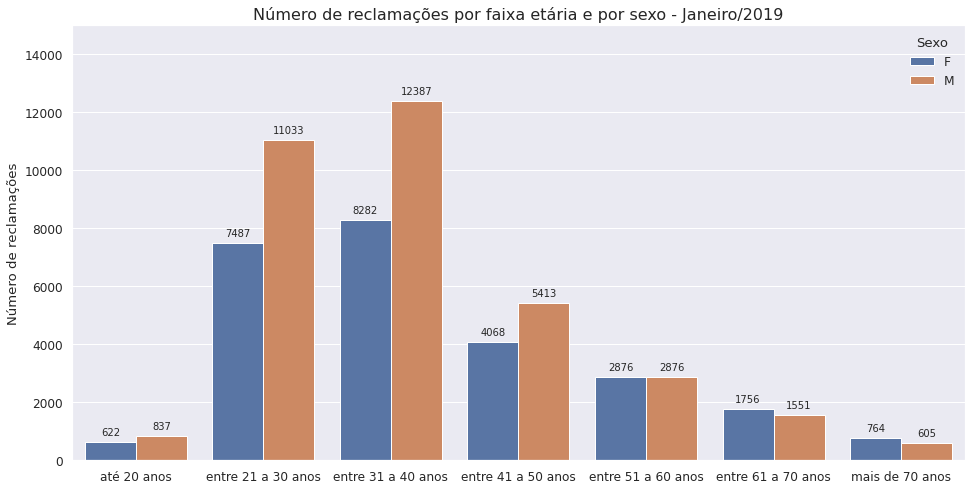

In [18]:
#Visualizando o número de reclamações por faixa etária e por sexo
plt.figure(figsize=(16,8))

ax = sns.countplot(data=dados, x="Faixa Etária", order=sorted(dados["Faixa Etária"].unique()), hue="Sexo")
ax.set_xlabel("")
ax.set_ylabel("Número de reclamações")
ax.set_title("Número de reclamações por faixa etária e por sexo - Janeiro/2019", fontsize=16)
ax.set_ylim(0, 15000)
anotacao(ax)

plt.show()

### **Empresa**

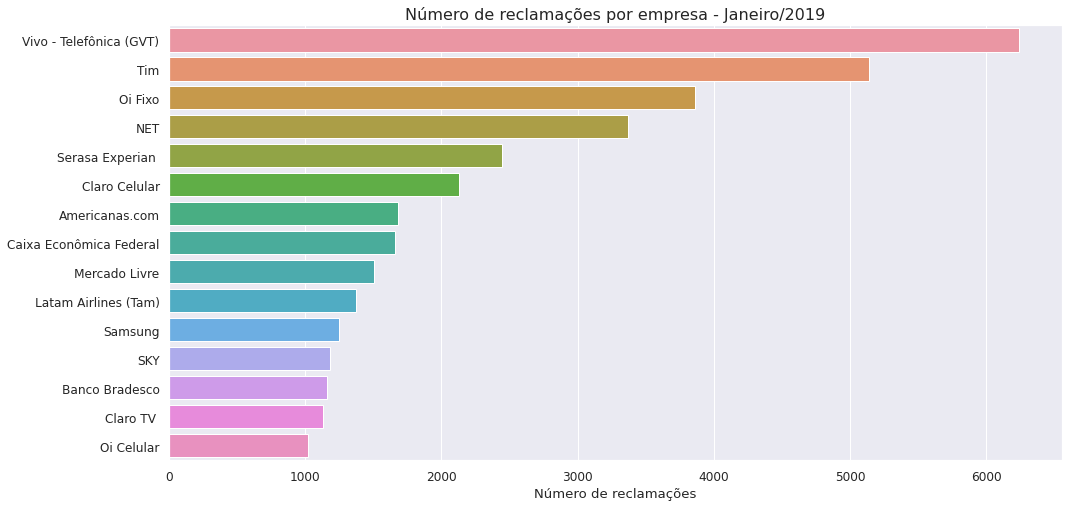

In [19]:
#Visualizando o número de reclamações por empresa
plt.figure(figsize=(16,8))

ax = sns.countplot(y=dados["Nome Fantasia"], order=pd.value_counts(dados["Nome Fantasia"]).iloc[:15].index)
ax.set_xlabel("Número de reclamações")
ax.set_ylabel("")
ax.set_title("Número de reclamações por empresa - Janeiro/2019", fontsize=16)

plt.show()

### **Segmento do Mercado**

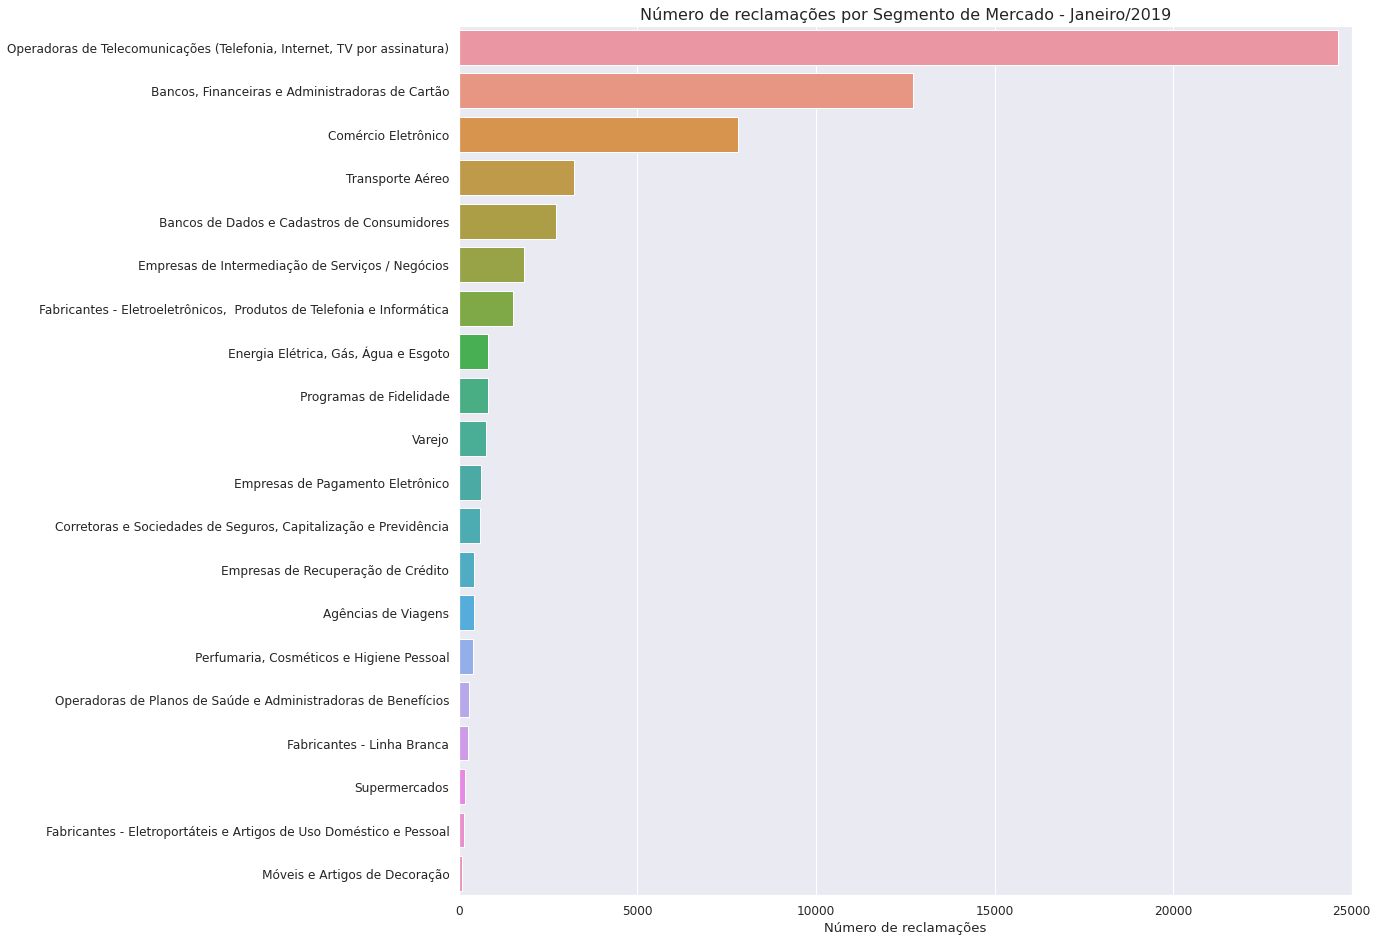

In [20]:
#Visualizando o número de reclamações por segmento do mercado
plt.figure(figsize=(16,16))

ax = sns.countplot(data=dados, y="Segmento de Mercado", order=pd.value_counts(dados["Segmento de Mercado"]).iloc[:20].index)
ax.set_xlabel("Número de reclamações")
ax.set_ylabel("")
ax.set_title("Número de reclamações por Segmento de Mercado - Janeiro/2019", fontsize=16)
ax.set_xlim(0, 25000)

plt.show()

### **Tipo de Problema**

In [21]:
display(pd.DataFrame(dados["Grupo Problema"].value_counts()))

,Grupo Problema
Cobrança / Contestação,25235
Contrato / Oferta,10933
Vício de Qualidade,8727
Atendimento / SAC,7337
Entrega do Produto,4703
Informação,3294
Saúde e Segurança,328


### **Como comprou ou contratou o serviço**

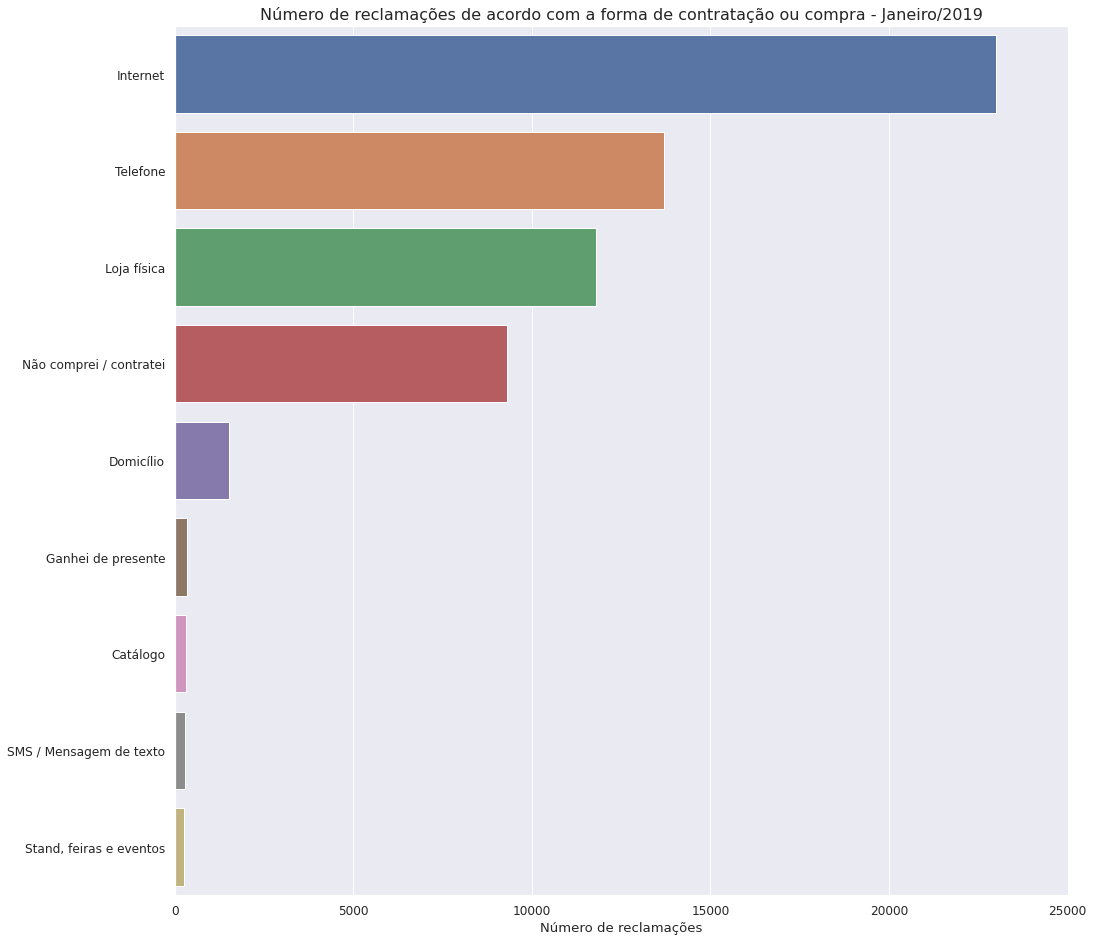

In [22]:
#Visualizando o número de reclamações de acordo com a forma de contratação ou compra
plt.figure(figsize=(16,16))

ax = sns.countplot(data=dados, y="Como Comprou Contratou", order=pd.value_counts(dados["Como Comprou Contratou"]).iloc[:20].index)
ax.set_xlabel("Número de reclamações")
ax.set_ylabel("")
ax.set_title("Número de reclamações de acordo com a forma de contratação ou compra - Janeiro/2019", fontsize=16)
ax.set_xlim(0, 25000)

plt.show()

In [47]:
#Calculando o número de reclamações de acordo com a forma de contratação ou compra e por idade
df = pd.crosstab(index = dados["Como Comprou Contratou"], columns = dados["Faixa Etária"])
df.style.background_gradient()

Faixa Etária,até 20 anos,entre 21 a 30 anos,entre 31 a 40 anos,entre 41 a 50 anos,entre 51 a 60 anos,entre 61 a 70 anos,mais de 70 anos
Como Comprou Contratou,,,,,,,
Catálogo,11,142,103,39,16,11,5
Domicílio,24,526,447,233,167,82,38
Ganhei de presente,18,130,118,52,28,7,3
Internet,688,7922,8847,3286,1455,605,198
Loja física,253,3436,3597,1930,1364,877,352
Não comprei / contratei,203,2393,2865,1612,1110,740,374
SMS / Mensagem de texto,12,101,97,35,26,13,1
"Stand, feiras e eventos",8,82,86,38,21,9,7
Telefone,242,3788,4509,2256,1565,963,391


In [59]:
#Calculando o número de reclamações de acordo com a forma de contratação ou compra e por idade normalizado pelas colunas
df = pd.crosstab(index = dados["Como Comprou Contratou"], columns = dados["Faixa Etária"], normalize="columns")
df.style.apply(colore_max, color="blue", axis=1).format("{:.2%}")

Faixa Etária,até 20 anos,entre 21 a 30 anos,entre 31 a 40 anos,entre 41 a 50 anos,entre 51 a 60 anos,entre 61 a 70 anos,mais de 70 anos
Como Comprou Contratou,,,,,,,
Catálogo,0.75%,0.77%,0.50%,0.41%,0.28%,0.33%,0.37%
Domicílio,1.64%,2.84%,2.16%,2.46%,2.90%,2.48%,2.78%
Ganhei de presente,1.23%,0.70%,0.57%,0.55%,0.49%,0.21%,0.22%
Internet,47.16%,42.78%,42.80%,34.66%,25.30%,18.29%,14.46%
Loja física,17.34%,18.55%,17.40%,20.36%,23.71%,26.52%,25.71%
Não comprei / contratei,13.91%,12.92%,13.86%,17.00%,19.30%,22.38%,27.32%
SMS / Mensagem de texto,0.82%,0.55%,0.47%,0.37%,0.45%,0.39%,0.07%
"Stand, feiras e eventos",0.55%,0.44%,0.42%,0.40%,0.37%,0.27%,0.51%
Telefone,16.59%,20.45%,21.82%,23.79%,27.21%,29.12%,28.56%


In [60]:
#Calculando o número de reclamações de acordo com a forma de contratação ou compra e por idade normalizado pelas linhas
df = pd.crosstab(index = dados["Como Comprou Contratou"], columns = dados["Faixa Etária"], normalize="index")
df.style.highlight_max(color="lavender", axis=1).format("{:.2%}")

Faixa Etária,até 20 anos,entre 21 a 30 anos,entre 31 a 40 anos,entre 41 a 50 anos,entre 51 a 60 anos,entre 61 a 70 anos,mais de 70 anos
Como Comprou Contratou,,,,,,,
Catálogo,3.36%,43.43%,31.50%,11.93%,4.89%,3.36%,1.53%
Domicílio,1.58%,34.67%,29.47%,15.36%,11.01%,5.41%,2.50%
Ganhei de presente,5.06%,36.52%,33.15%,14.61%,7.87%,1.97%,0.84%
Internet,2.99%,34.44%,38.46%,14.29%,6.33%,2.63%,0.86%
Loja física,2.14%,29.10%,30.46%,16.34%,11.55%,7.43%,2.98%
Não comprei / contratei,2.18%,25.74%,30.82%,17.34%,11.94%,7.96%,4.02%
SMS / Mensagem de texto,4.21%,35.44%,34.04%,12.28%,9.12%,4.56%,0.35%
"Stand, feiras e eventos",3.19%,32.67%,34.26%,15.14%,8.37%,3.59%,2.79%
Telefone,1.76%,27.62%,32.88%,16.45%,11.41%,7.02%,2.85%


### **Procurou Empresa**

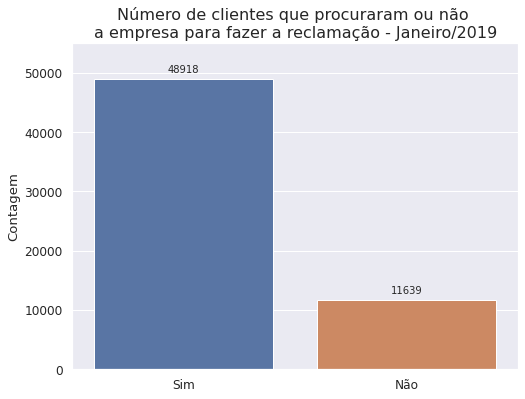

In [67]:
#Visualizando o número de consumidores que procuraram ou não a empresa para fazer a reclamação
plt.figure(figsize=(8,6))

ax = sns.countplot(data=dados, x="Procurou Empresa")
ax.set_xlabel("")
ax.set_ylabel("Contagem")
ax.set_title("Número de consumidores que procuraram ou não \na empresa para fazer a reclamação - Janeiro/2019", fontsize=16)
ax.set_xticklabels(["Sim", "Não"])
ax.set_ylim(0, 55000)
anotacao(ax)

plt.show()

### **Nota do Consumidor**

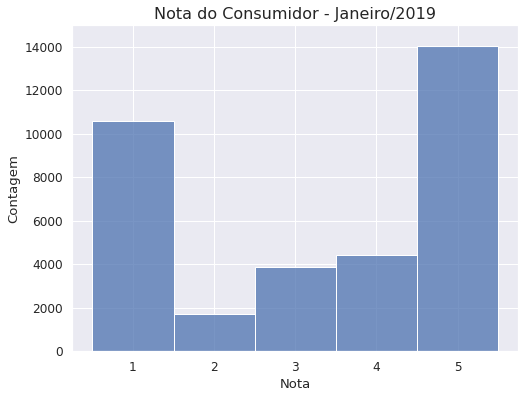

In [101]:
plt.figure(figsize=(8,6))

ax = sns.histplot(dados, x="Nota do Consumidor", discrete=True)
ax.set_xlabel("Nota")
ax.set_ylabel("Contagem")
ax.set_title("Nota do Consumidor - Janeiro/2019", fontsize=16)
ax.set_ylim(0, 15000)

plt.show()

### **Tempo de Resposta**

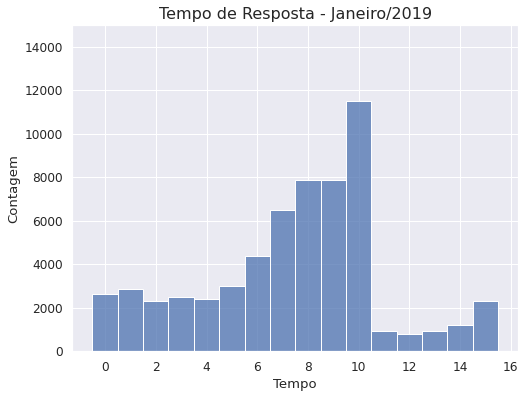

In [103]:
plt.figure(figsize=(8,6))

ax = sns.histplot(dados, x="Tempo Resposta", discrete=True)
ax.set_xlabel("Tempo")
ax.set_ylabel("Contagem")
ax.set_title("Tempo de Resposta - Janeiro/2019", fontsize=16)
ax.set_ylim(0, 15000)

plt.show()